## Loading data

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score as balAcc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

In [ ]:
# Loading the data and visualizing it
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Printing out information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We have both numerical and categorical data (quite some categorical features).

In [ ]:
# We can see how many values the categorical features can take...
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

The 'job' feature has 12 different values.

In [ ]:
# We can look at information from the numerical features as well
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


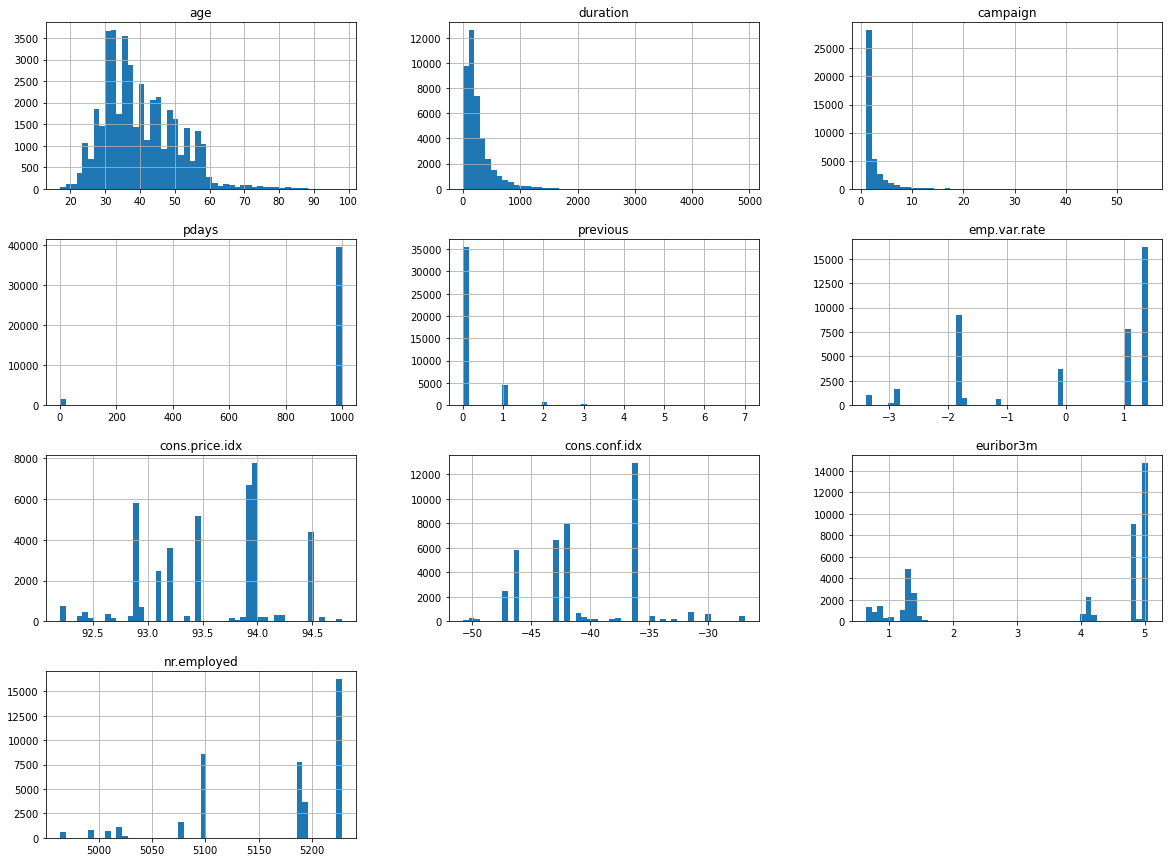

In [ ]:
# And even plot numerical features to visualize them 
blob = data.hist(bins=50, figsize=(20,15))

We can see that even though **'pdays'** is a **numerical feature** it almost always has **one of two values (0 or 999)**.

Given its meaning: *number of days that passed by after the client was last contacted (with 999 meaning he was not contacted)*, we can assume that individuals were either recently contacted or not contacted at all.



## Data preprocessing

In [ ]:
# Making sure we work on a copy
data = data.copy()

In [ ]:
# Encoding the label to numeric values
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
# One hot Encoding for the categorical features
data = pd.get_dummies(data)
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Deleting 'duration' column
data = data.drop(columns=['duration'])
data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Checking for missing values
data.isnull().sum().sum()

0

Since there are no missing values, we do not need to drop any rows.

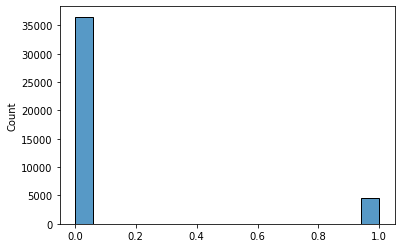

In [ ]:
# Plotting the labels histogram to analyze its balance
y = data['y'].values
blob = sns.histplot(y, kde=False)

In [ ]:
# Calculating the imbalance of the dataset
value, count = np.unique(y, return_counts=True)
print('Percentage of zeros: %f' % (count[0]*100/(count[0]+count[1])))
print('Percentage of ones: %f' % (count[1]*100/(count[0]+count[1])))

Percentage of zeros: 88.734583
Percentage of ones: 11.265417


## Modelling the data

In [ ]:
# Separating training and testing sets with stratification
train_set, test_set = train_test_split(data, test_size=0.2, random_state=50, stratify=y)
print('Training set size: %d' % len(train_set))
print('Test set size: %d' % len(test_set))

Training set size: 32950
Test set size: 8238


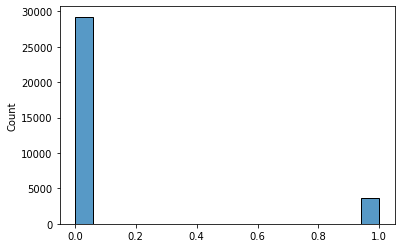

In [ ]:
# Checking stratification
y_train = train_set['y'].values
blob = sns.histplot(y_train, kde=False)

In [ ]:
value_train, count_train = np.unique(y_train, return_counts=True)
print('Percentage of zeros: %f' % (count_train[0]*100/(count_train[0]+count_train[1])))
print('Percentage of ones: %f' % (count_train[1]*100/(count_train[0]+count_train[1])))

Percentage of zeros: 88.734446
Percentage of ones: 11.265554


The stratified splitting was done correctly, we can observe that the percentages of 0's and 1's in *training_set* are very similar to those of the complete dataset.

In [ ]:
# Copying the training set and separating it into features and label
df = train_set.copy()
y_df = df['y'].copy()
X_df = df.drop(columns=['y']).copy()

In [ ]:
# CV scores of a Random Forest Classifier with the Area Under the Receiver Operating Characteristic Curve (auc) metric
clf = RandomForestClassifier(n_estimators=400, max_depth=6) # QUIZ
scores_cv = cross_val_score(clf, X_df, y_df, cv=10, scoring = make_scorer(auc)) # QUIZ
# StratifiedKFold is used by default in cross_val_score IF a) cv is integer, b) estimator is a classifier, and c) y is binary or multiclass
#print(scores_ras)

# CV scores of a Dummy Classifier with the Area Under the Receiver Operating Characteristic (auc) metric
dummy_clf = DummyClassifier(strategy = 'stratified')
dummy_scores = cross_val_score(dummy_clf, X_df, y_df, cv=10, scoring=make_scorer(auc)) # QUIZ
#print(dummy_scores)

# Comparison of the results
print("Random Forest average: %0.8f +/- %0.8f" % (scores_cv.mean(), scores_cv.std()))
print("Dummy average: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

Random Forest average: 0.58366353 +/- 0.01726752
Dummy average: 0.50072435 +/- 0.00615512


The Random Forest model performed better than a general Dummy classifier. This is a good sign, however, it might need tuning to provide a better performance. This can be done using GridSearchCV.

In [ ]:
# Other possible metrics for CV scoring (because of imbalanced datasets)

#scores_balAcc = cross_val_score(clf, X_df, y_df, cv=10, scoring = make_scorer(balAcc))
#print(scores_balAcc)
#print("\nBalanced Accuracy average: %0.8f +/- %0.8f \n" % (scores_balAcc.mean(), scores_balAcc.std()))
#scores_f1 = cross_val_score(clf, X_df, y_df, cv=10, scoring = make_scorer(f1))
#print(scores_f1)
#print("\nF1 average: %0.8f +/- %0.8f \n" % (scores_f1.mean(), scores_f1.std()))

In [ ]:
# Definition of parameters to test
trees = [int(x) for x in np.linspace(50, 150, 3)]
depth = [int(x) for x in np.linspace(2, 6, 3)]
split = [int(x) for x in np.linspace(2, 10, 3)]
leaf = [int(x) for x in np.linspace(1, 9, 3)]

rf_params = {
    'n_estimators': trees,
    'max_depth': depth,
    'min_samples_split': split,
    'min_samples_leaf': leaf
}

# Grid Search for hyper-parameter tuning
clf = GridSearchCV(clf, param_grid=rf_params, scoring=make_scorer(auc), n_jobs=-1)
clf.fit(X_df, y_df)
print(clf)

GridSearchCV(estimator=RandomForestClassifier(max_depth=6, n_estimators=400),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 5, 9],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [50, 100, 150]},
             scoring=make_scorer(roc_auc_score))


In [ ]:
# CV metric of the parameter-tuned Random Forest Classifier
print("Average AUC parameter tuning:", clf.best_score_)

Average AUC parameter tuning: 0.5849087219856273


The average is better than the previous one, but just slightly.

In [ ]:
# Best estimator found with GridSearchCV
clf = clf.best_estimator_
# QUIZ - clf = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=60)
# QUIZ - clf.fit(X_df, y_df)
clf

RandomForestClassifier(max_depth=6, min_samples_leaf=9)

In [ ]:
# Top 3 features
importances = clf.feature_importances_
#importances
#std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
#std
indices = np.argsort(importances)[::-1]
#print(indices)
#X_df.columns
for no in range(3): # top 3
  print(X_df.columns[indices[no]])

nr.employed
euribor3m
pdays


## Prediction

In [ ]:
# All of the preprocessing was done before splitting into TRAINING and TESTING (because there were no missing values)

# Copying test set
df_test = test_set.copy()

# Separating features and label
y_df_test = df_test['y'].copy()
X_df_test = df_test.drop(columns=['y']).copy()

# Making sure the same number of features are used in both the training and testing set
assert X_df.shape[1] == X_df_test.shape[1]

# Prediction
# QUIZ - clf = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=60)
# QUIZ - clf.fit(X_df, y_df)
y_pred = clf.predict(X_df_test)

# Metric when generalizing
f1(y_df_test, y_pred)

0.31438127090301